In [2]:


import numpy as np  
import pandas as pd  
from pandas import Series, DataFrame
from matplotlib import pyplot as plt  
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf  
from statsmodels.tsa.seasonal import seasonal_decompose  
from pandas.plotting import register_matplotlib_converters  
register_matplotlib_converters()
%matplotlib inline
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15, 6

In [3]:
#pip install pmdarima

In [4]:
df = pd.read_csv('white wine.csv')
df

,Year,Month,Relative Interest
0,2010,1,54
1,2010,2,54
2,2010,3,58
3,2010,4,52
4,2010,5,61
...,...,...,...
67,2015,8,81
68,2015,9,72
69,2015,10,70
70,2015,11,83


In [5]:
df["Date"] = df['Year'].astype(str) +"-"+ df["Month"].astype(str)
print(df)


    Year  Month  Relative Interest     Date
0   2010      1                 54   2010-1
1   2010      2                 54   2010-2
2   2010      3                 58   2010-3
3   2010      4                 52   2010-4
4   2010      5                 61   2010-5
..   ...    ...                ...      ...
67  2015      8                 81   2015-8
68  2015      9                 72   2015-9
69  2015     10                 70  2015-10
70  2015     11                 83  2015-11
71  2015     12                100  2015-12

[72 rows x 4 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               72 non-null     int64 
 1   Month              72 non-null     int64 
 2   Relative Interest  72 non-null     int64 
 3   Date               72 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.4+ KB


In [7]:
df.head()


,Year,Month,Relative Interest,Date
0,2010,1,54,2010-1
1,2010,2,54,2010-2
2,2010,3,58,2010-3
3,2010,4,52,2010-4
4,2010,5,61,2010-5


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               72 non-null     int64         
 1   Month              72 non-null     int64         
 2   Relative Interest  72 non-null     int64         
 3   Date               72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.4 KB


In [9]:
dff = df[['Date','Relative Interest']].copy()

In [10]:
dff.set_index('Date', inplace=True)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
decompose_dff = seasonal_decompose(dff['Relative Interest'],model ="additive")

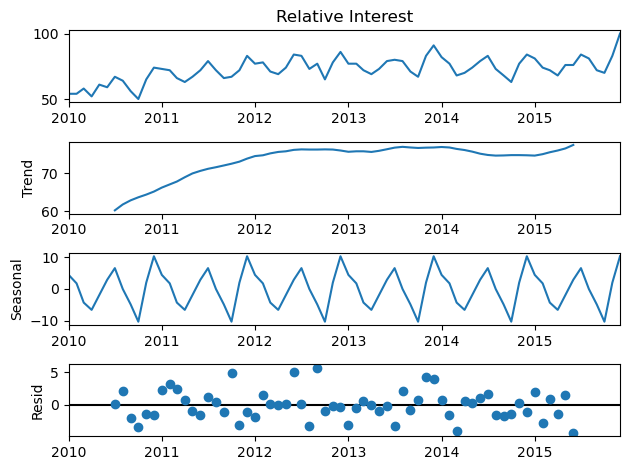

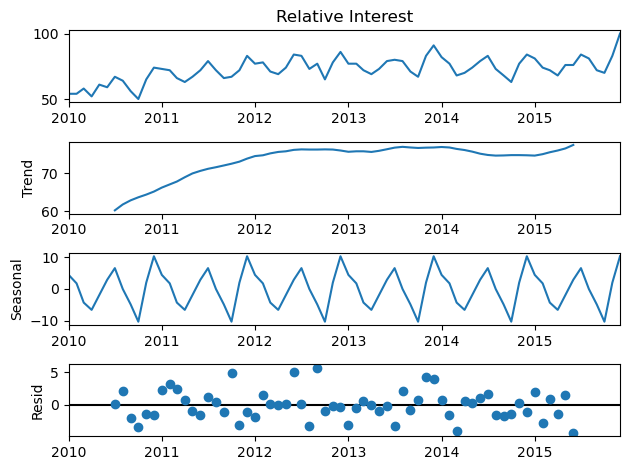

In [13]:
decompose_dff.plot()

In [14]:
df_log = np.log(dff['Relative Interest'])

<AxesSubplot:xlabel='Date'>

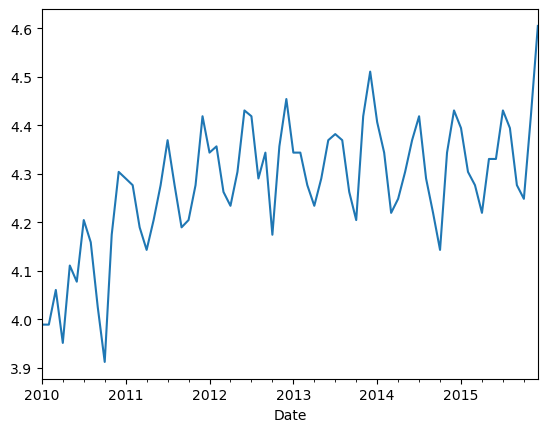

In [15]:
df_log.plot()

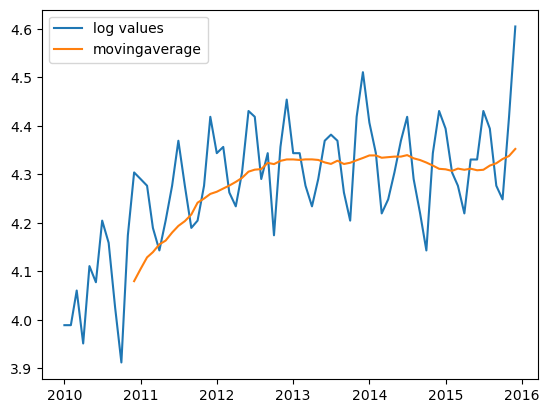

In [16]:
movingaverage = df_log.rolling(window=12).mean()
movingstd = df_log.rolling(window=12).std()
plt.plot(df_log,label='log values')
plt.plot(movingaverage,label='movingaverage')
plt.legend(loc='best')

In [17]:
result=adfuller(df_log)

In [18]:
print('ADF Statistic: {}'.format(result[0]))  
print('p-value: {}'.format(result[1]))  
print('Critical Values:')  
for key, value in result[4].items():  
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.9119029249667538
p-value: 0.32648248415558656
Critical Values:
	1%: -3.5463945337644063
	5%: -2.911939409384601
	10%: -2.5936515282964665


<AxesSubplot:xlabel='Date'>

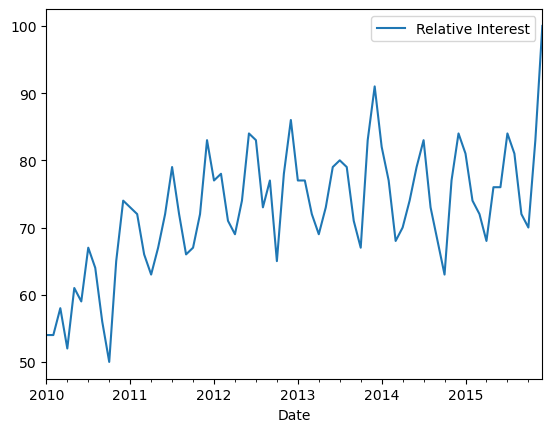

In [14]:
dff.plot()

In [15]:
#test_stationarity(dff['Relative Interest'])

In [16]:
dff['Relative Interest'] = dff['Relative Interest'] - dff['Relative Interest'].shift(1)

In [17]:
dff['Relative Interest'].shift(1)

Date
2010-01-01     NaN
2010-02-01     NaN
2010-03-01     0.0
2010-04-01     4.0
2010-05-01    -6.0
              ... 
2015-08-01     8.0
2015-09-01    -3.0
2015-10-01    -9.0
2015-11-01    -2.0
2015-12-01    13.0
Name: Relative Interest, Length: 72, dtype: float64

In [18]:
dff['Seasonal First Difference']= dff['Relative Interest']-dff['Relative Interest'].shift(12)

In [19]:
dff.head(14)

,Relative Interest,Seasonal First Difference
Date,,
2010-01-01,NaN,NaN
2010-02-01,0.0,NaN
2010-03-01,4.0,NaN
2010-04-01,-6.0,NaN
2010-05-01,9.0,NaN
2010-06-01,-2.0,NaN
2010-07-01,8.0,NaN
2010-08-01,-3.0,NaN
2010-09-01,-8.0,NaN


In [20]:
dff=dff.dropna()

In [21]:
result=adfuller(dff['Seasonal First Difference'])

In [22]:
print('ADF Statistic: {}'.format(result[0]))  
print('p-value: {}'.format(result[1]))  
print('Critical Values:')  
for key, value in result[4].items():  
    print('\t{}: {}'.format(key, value))

ADF Statistic: -8.253223668278304
p-value: 5.321452505620558e-13
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997


<AxesSubplot:xlabel='Date'>

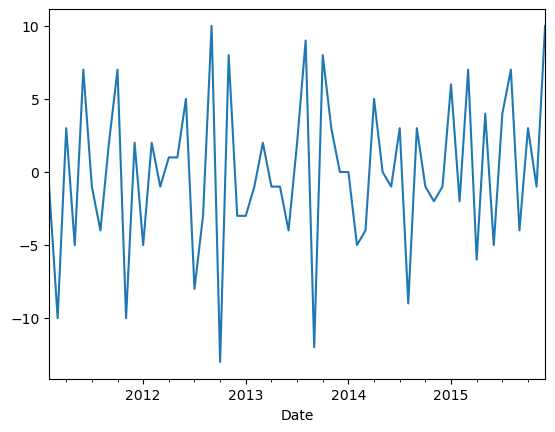

In [23]:
dff['Seasonal First Difference'].plot()

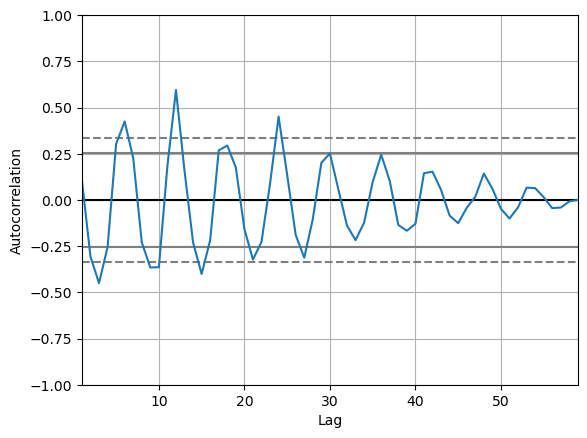

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dff['Relative Interest'])
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [26]:
import statsmodels.api as sm

C:\Users\krisp\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


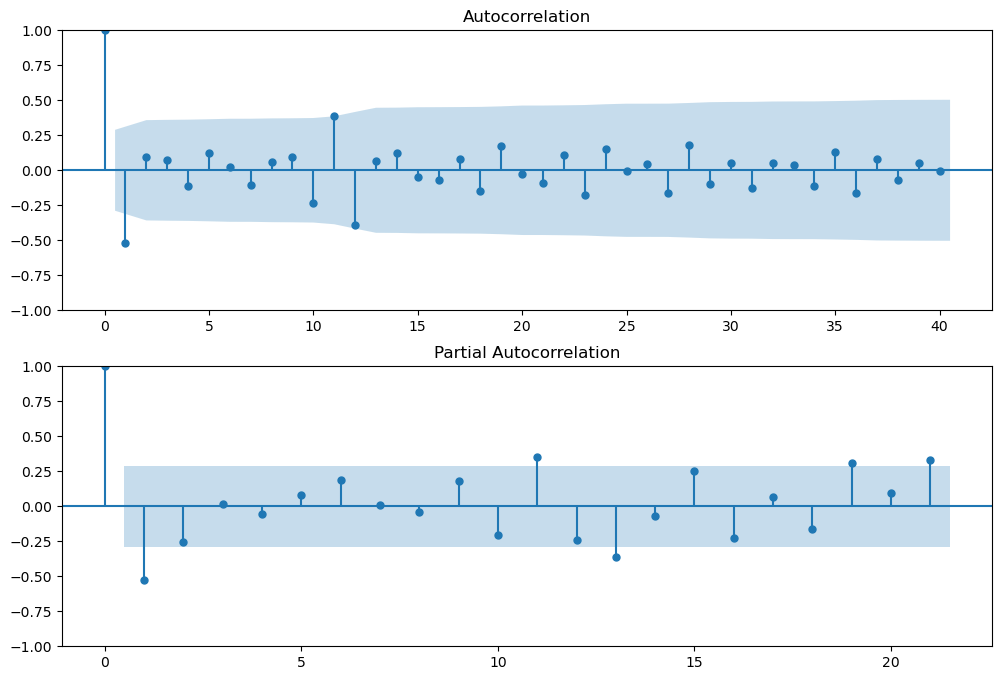

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dff['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dff['Seasonal First Difference'].iloc[13:],lags=21,ax=ax2)

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
model=ARIMA(dff['Relative Interest'],order=(1,1,1))
model_fit=model.fit()

C:\Users\krisp\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\krisp\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\krisp\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\krisp\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Relative Interest   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -198.608
Date:                Tue, 08 Nov 2022   AIC                            403.217
Time:                        16:13:32   BIC                            409.398
Sample:                    02-01-2011   HQIC                           405.625
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1366      0.214      0.639      0.523      -0.282       0.555
ma.L1         -0.9998     46.039     -0.022      0.983     -91.235      89.235
sigma2        51.6848   2373.664      0.022      0.983   -4600.611    4703.981
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.84   Prob(JB):                         0.43
Heteroskedasticity (H):               1.60   Skew:                             0.28
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

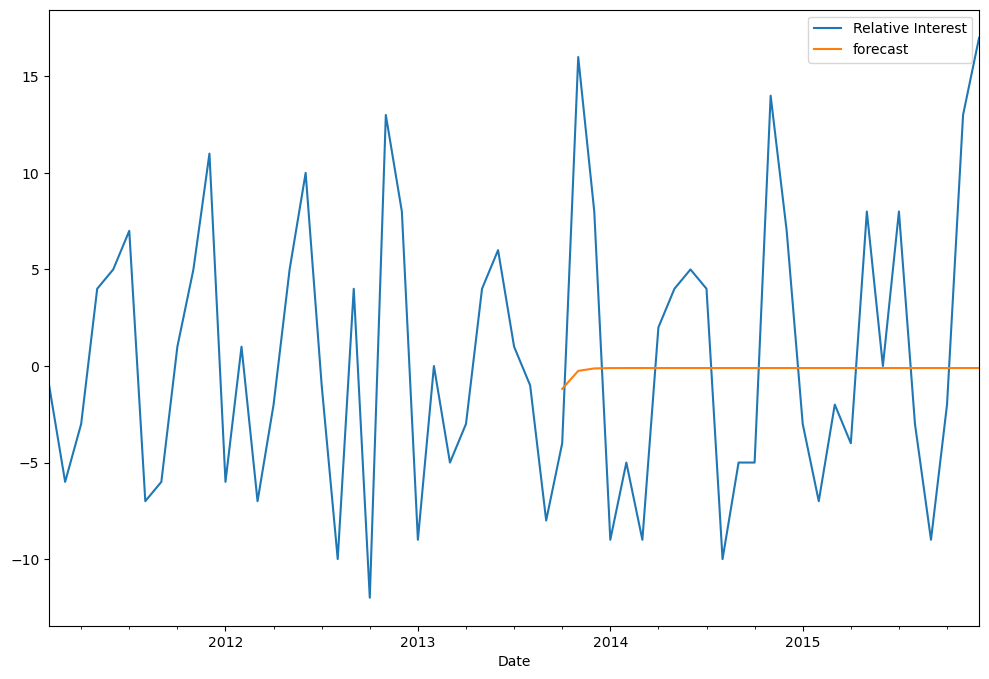

In [31]:
dff['forecast']=model_fit.predict(start=32,end=103,dynamic=True)
dff[['Relative Interest','forecast']].plot(figsize=(12,8))

In [32]:
import statsmodels.api as sm

In [33]:
model=sm.tsa.statespace.SARIMAX(dff['Relative Interest'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\krisp\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\krisp\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\krisp\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<AxesSubplot:xlabel='Date'>

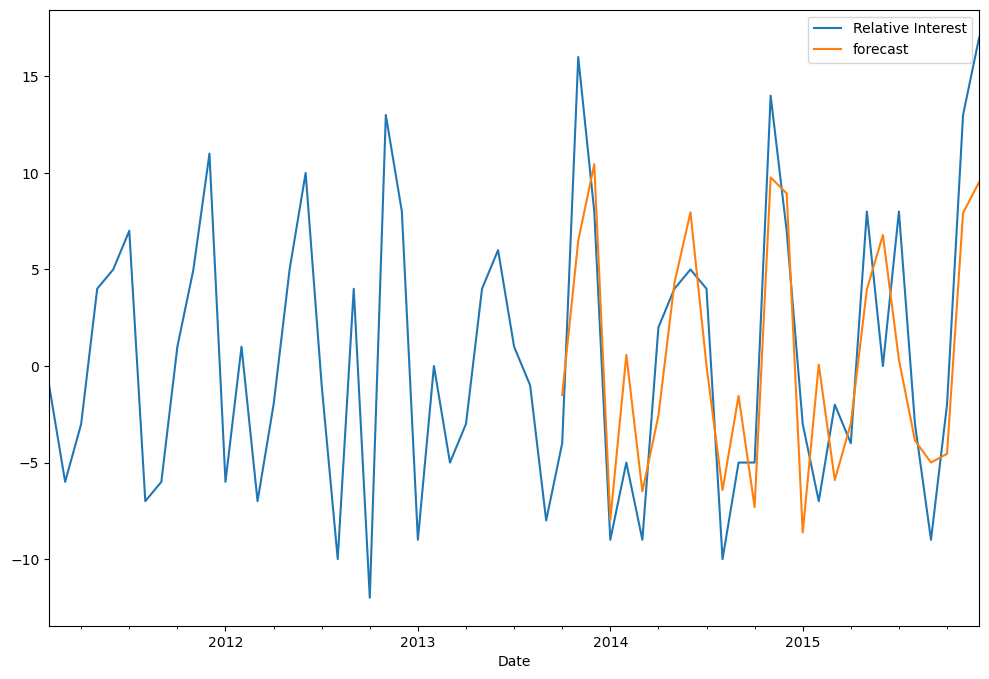

In [34]:
dff['forecast']=results.predict(start=32,end=120,dynamic=True)
dff[['Relative Interest','forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[dff.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dff.columns)

In [37]:
future_datest_df.tail()

,Relative Interest,Seasonal First Difference,forecast
2017-07-01,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN


In [38]:
future_df=pd.concat([dff,future_datest_df])

<AxesSubplot:>

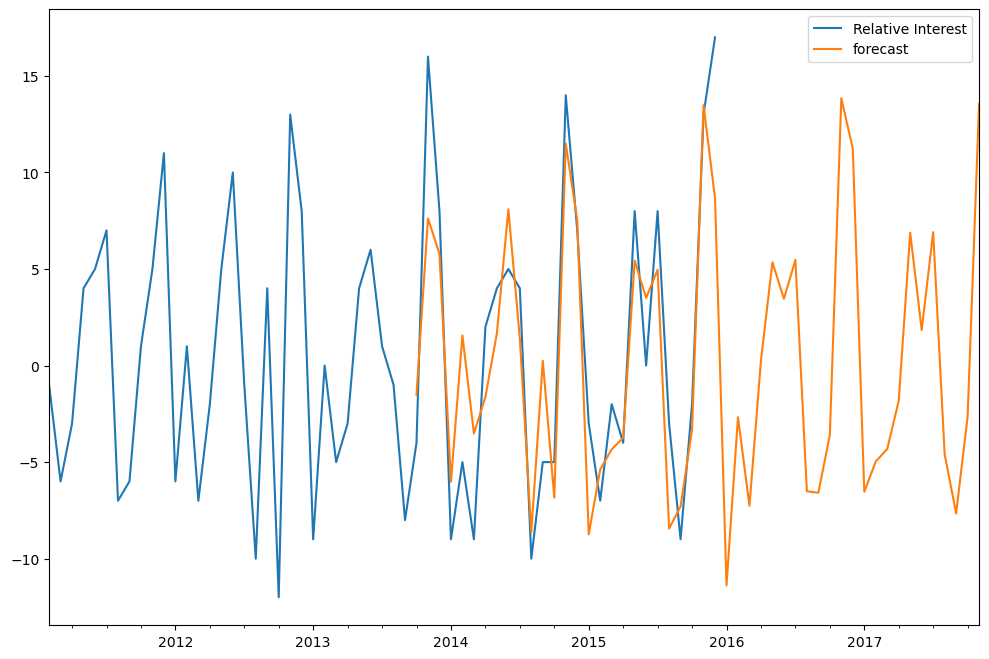

In [39]:
future_df['forecast'] = results.predict(start =32, end = 120,)  
future_df[['Relative Interest', 'forecast']].plot(figsize=(12, 8)) 

In [40]:
future_df

,Relative Interest,Seasonal First Difference,forecast
2011-02-01,-1.0,-1.0,NaN
2011-03-01,-6.0,-10.0,NaN
2011-04-01,-3.0,3.0,NaN
2011-05-01,4.0,-5.0,NaN
2011-06-01,5.0,7.0,NaN
...,...,...,...
2017-07-01,NaN,NaN,6.907932
2017-08-01,NaN,NaN,-4.593400
2017-09-01,NaN,NaN,-7.658747
2017-10-01,NaN,NaN,-2.643850


In [105]:
df_log = np.log(dff['Relative Interest'])
#plt.plot(dff['Date'],dff['Relative Interest'])
df_log

Date
2011-02-01    1.098612
2011-03-01    2.079442
2011-04-01        -inf
2011-05-01    3.044522
2011-06-01         NaN
2011-07-01         NaN
2011-08-01    0.000000
2011-09-01    1.609438
2011-10-01         NaN
2011-11-01         NaN
2011-12-01    1.945910
2012-01-01         NaN
2012-02-01    0.000000
2012-03-01    2.197225
2012-04-01         NaN
2012-05-01    2.833213
2012-06-01         NaN
2012-07-01    0.693147
2012-08-01    0.000000
2012-09-01         NaN
2012-10-01         NaN
2012-11-01    1.098612
2012-12-01    1.098612
2013-01-01         NaN
2013-02-01    2.397895
2013-03-01    1.791759
2013-04-01    1.098612
2013-05-01    2.708050
2013-06-01         NaN
2013-07-01         NaN
2013-08-01         NaN
2013-09-01    1.791759
2013-10-01         NaN
2013-11-01        -inf
2013-12-01    1.609438
2014-01-01         NaN
2014-02-01    1.609438
2014-03-01    1.386294
2014-04-01    2.564949
2014-05-01    2.708050
2014-06-01         NaN
2014-07-01    1.386294
2014-08-01    0.693147
2014-0

Below are error datas please neglect 
regards,
Krishnaprasad

In [41]:
df_log=df_log.dropna()


NameError: name 'df_log' is not defined

In [ ]:
def get_stationarity(timeseries):  
      
    # rolling statistics  
    rolling_mean = timeseries.rolling(window=12).mean()  
    rolling_std = timeseries.rolling(window=12).std()  
      
    # rolling statistics plot  
    original = plt.plot(timeseries, color='blue', label='Original')  
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')  
    std = plt.plot(rolling_std, color='black', label='Rolling Std')  
    plt.legend(loc='best')  
    plt.title('Rolling Mean & Standard Deviation')  
    plt.show(block=False)  
      
    # Dickey–Fuller test:  
    result = adfuller(timeseries['Relative Interest'])  
    print('ADF Statistic: {}'.format(result[0]))  
    print('p-value: {}'.format(result[1]))  
    print('Critical Values:')  
    for key, value in result[4].items():  
        print('\t{}: {}'.format(key, value))

In [2]:
rolling_mean = df_log.rolling(window=5).mean()  
df_log_minus_mean = df_log - rolling_mean  
df_log_minus_mean.dropna(inplace=True)

NameError: name 'df_log' is not defined

In [3]:
#movingaverage = df_log.rolling(window=12).mean()
#movingstd = df_log.rolling(window=12).std()
#plt.plot(df_log,label='log values')
#plt.plot(movingaverage,label='movingaverage')
#plt.legend(loc='best')

In [4]:
get_stationarity(df_log_minus_mean)

NameError: name 'get_stationarity' is not defined

In [5]:
rolling_mean_exp_decay = df_log.ewm(halflife=5, min_periods=0, adjust=True).mean()  
df_log_exp_decay = df_log - rolling_mean_exp_decay  
df_log_exp_decay.dropna(inplace=True)

NameError: name 'df_log' is not defined

In [6]:
get_stationarity(df_log_exp_decay)

NameError: name 'get_stationarity' is not defined

In [7]:
df_log_shift = df_log - df_log.shift()  
df_log_shift.dropna(inplace=True)

NameError: name 'df_log' is not defined

In [8]:
get_stationarity(df_log_shift)

NameError: name 'get_stationarity' is not defined